In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv')#using pandas to import my dataset

In [3]:
print(dataset)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

In [4]:
dataset.describe()#to  check if my dataset is properly imported

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
#8a from scikit learn
x=dataset['mpg'].values.reshape(-1,1)
y=dataset['horsepower'].values.reshape(-1,1)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)#split the datasset into training and test sets

In [7]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)#fitting the model

LinearRegression()

In [8]:
print(regressor.intercept_)

[193.85741606]


In [9]:
print(regressor.coef_)

[[-3.77274859]]


In [10]:
pred_y=regressor.predict(x_test)

In [11]:
pred_and_response = pd.DataFrame({'predictor': x_train.flatten(), 'respnse': y_train.flatten()})
pred_and_response

,predictor,respnse
0,27.5,95
1,18.0,97
2,11.0,208
3,17.0,110
4,14.0,215
...,...,...
289,15.0,150
290,18.0,100
291,23.8,85
292,29.9,65


In [12]:
pred_and_response.describe()

,predictor,respnse
count,294.000000,294.000000
mean,23.692177,104.472789
std,8.011347,38.600221
min,9.000000,46.000000
25%,17.500000,75.000000
50%,23.000000,92.500000
75%,30.000000,129.750000
max,46.600000,230.000000


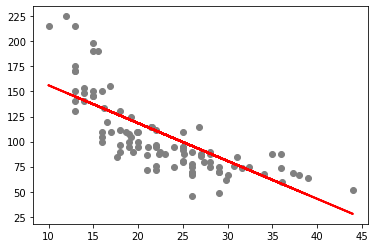

In [13]:
#8b
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, pred_y, color='red', linewidth=2)#plotting least square regression line
plt.show()

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_y))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_y))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_y)))

Mean Absolute Error: 19.21528561518464
Mean Squared Error: 610.4099424898989
Root Mean Squared Error: 24.706475719735884


In [15]:
#8a from statsmodel
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf

In [16]:
#commands for fitting the model
mod = smf.ols("mpg~horsepower",data=dataset)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        16:27:30   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

8ai)yes the  p-value of 0.000 of horsepower shows our inability to reject the null hypothesis for horsepower thus we have a relationship which is y=39.9359 -0.1578x
8aii)For every 1000 units of horsepower, the model value decreases by 1578
8aiii)negative relationship

In [17]:
#8aiv)
res.predict(pd.DataFrame({"horsepower": [98]}))

0    24.467077
dtype: float64

In [18]:
predictionset = res.get_prediction(pd.DataFrame({"horsepower": [98]}))
print(predictionset)

In [19]:
predictionset.summary_frame()#for calculating confidence interval

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


Text(0, 0.5, 'residual')

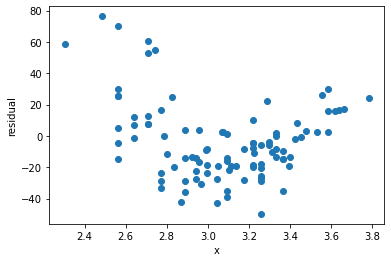

In [20]:
#8c
plt.scatter(x_test,y_test-pred_y)
#plt.scatter(np.log(x_test),y_test-pred_y)
plt.xlabel("x")
plt.ylabel("residual")

The fit shows the problem of heterosadicity i.e the variance is not constant thtroughout of the error term.To fix this we use the log,sqrt,x^2